In [1]:
import student as s
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [2]:
# get student data from files
students = s.import_safe_file("students-2016-merged.xlsx")
repeating = s.import_safe_file("students-2016-repeating.xlsx")

In [3]:
# create a pretty color scheme
a = np.random.random(10)
cs = cm.Set1(np.arange(10)/10.)

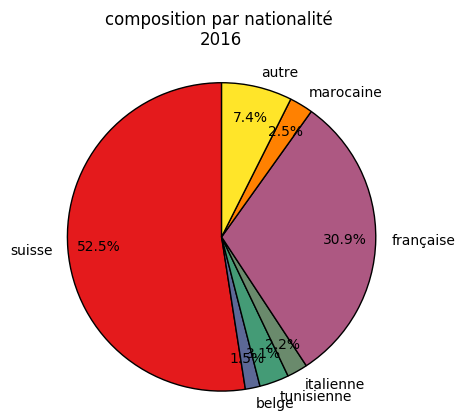

In [15]:
nationalities = []
for student in students:
    nationalities.append(student.data['nationality'])

counted = {}
for i,nat in enumerate(nationalities):
    if nat in counted:
        counted[nat] += 1
    else:
        counted[nat] = 1
       
values, names = [[],[]]
counted['autre'] = 0
for k in counted.keys():
    if counted[k] < 5 and k is not 'autre':
        counted['autre'] += counted[k]
        counted[k] = 0
    elif (k is not 'autre'):
        values.append(counted[k])
        names.append(k)

values.append(counted['autre'])
names.append("autre")
        
plt.pie(values, 
        labels=names,
        autopct='%1.1f%%',
        colors=cs,
        startangle=90,
        pctdistance=0.8)
plt.axis('square')
plt.title("composition par nationalité \n2016", y=1.1)
plt.show()

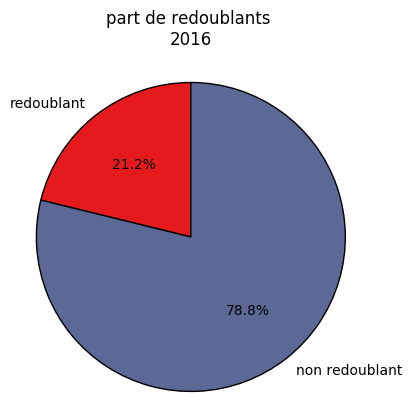

In [11]:
num_repeating = 0
for student in students:
    for rep in repeating:
        if student.data['SCIPER'] == rep.data['SCIPER']:
            num_repeating += 1
            break

plt.pie([num_repeating,len(students)],
        labels=["redoublant","non redoublant"], 
        autopct='%1.1f%%',
        colors=cs,
        startangle=90)
plt.axis('square')
plt.title("part de redoublants \n2016", y=1.1)
plt.show()

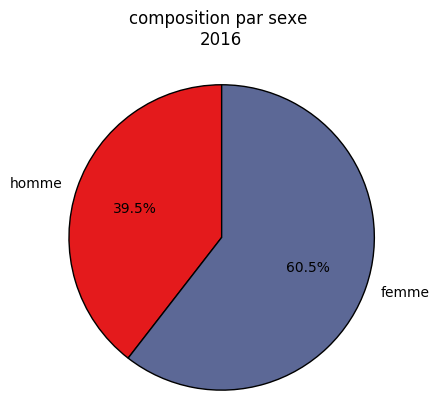

In [12]:
num_m = len(s.get_students_by_keys(students,{'sex':"M"}))
num_f = len(s.get_students_by_keys(students,{'sex':"F"}))

plt.pie([num_m,num_f],
        labels=["homme","femme"],
        autopct='%1.1f%%',
        colors=cs,
        startangle=90)
plt.axis('square')
plt.title("composition par sexe \n2016", y=1.1)
plt.show()

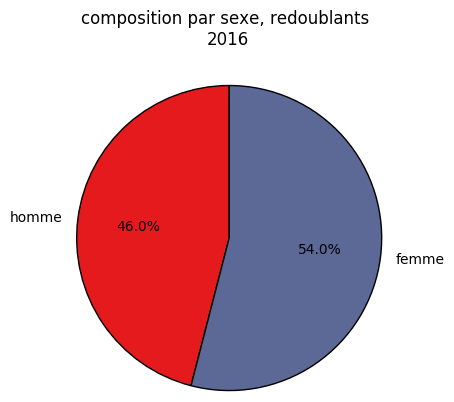

In [13]:
num_m = len(s.get_students_by_keys(repeating,{'sex':"M"}))
num_f = len(s.get_students_by_keys(repeating,{'sex':"F"}))

plt.pie([num_m,num_f],
        labels=["homme","femme"],
        autopct='%1.1f%%',
        colors=cs,
        startangle=90)
plt.axis('square')
plt.title("composition par sexe, redoublants \n2016", y=1.1)
plt.show()